## Plot maps

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation : 2025-03-25
- at CCIN2P3 : Kernel anaconda2025-py311
- `conda install -c conda-forge basemap`
- `conda install -c conda-forge basemap-data-hires` 


In [1]:
from libGMAOMERRA2Data import *

/pbs/throng/lsst/users/dagoret/desc/2025/anaconda3-py311/lib/python3.11/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
all_longs

[-70.7366833333333,
 -70.40300000000002,
 5.71222222222,
 0.142777,
 -116.86300000000003]

In [3]:
all_lats

[-30.240741666666672,
 -24.625199999999996,
 43.9316666667,
 42.9363888,
 33.35600000000001]

In [4]:
all_tags

['LSST', 'Paranal', 'OHP', 'PDM', 'Palomar']

In [5]:
import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

import h5py

In [6]:
# Remove to run faster the notebook
# conda install -c conda-forge ipywidgets
# pip install ipywidgets
# Not working
#import ipywidgets as widgets
#%matplotlib widget

## Select data

In [7]:
#DATAFIELD_NAME =  'TO3'
#DATAFIELD_UNIT = DATAFIELD_NAME+' (Ozone:Db) '
    
DATAFIELD_NAME =  'TQV'
DATAFIELD_UNIT = DATAFIELD_NAME+' (PWV:mm) '
    

os.environ["HDFEOS_ZOO_DIR"] = "/Users/dagoret/DATA/MERRA2/inst1_2d_asm_Nx_M2I1NXASM/2025"
os.environ["HDFEOS_ZOO_DIR"] =  "/sps/lsst/groups/auxtel/MERRA2/data/inst1_2d_asm_Nx_M2I1NXASM/2025"

# If a certain environment variable is set, look there for the input
# file, otherwise look in the current directory.
   
hdffile = 'MERRA2_400.inst1_2d_asm_Nx.20250101.nc4'
    
   
FILE_NAME= hdffile
    
base_filename=os.path.basename(FILE_NAME).split('.hdf')[0]
p = re.compile('[.]')
root_filename=p.sub('_',base_filename)    
rootimg_dir=os.path.join('test_images',root_filename)
    
try:
    FILE_NAME = os.path.join(os.environ['HDFEOS_ZOO_DIR'], hdffile)
except KeyError:
    pass
 

## Access to data

In [8]:
(data3D,unit,longname) = GetGeoRefData(FILE_NAME,DATAFIELD_NAME)
    
data= data3D[0,:,:] ## the first index is the time, for example take the first one
    
(lat,un_lat,nm_lat) = Get1DData(FILE_NAME,'lat')
latitude = lat[:]
(lon,un_lon,nm_lon) = Get1DData(FILE_NAME,'lon')
longitude = lon[:]
(tim,un_tim,nm_tim) = Get1DData(FILE_NAME,'time')
thetime=tim[:]

## Spacing in longitude and latitudes

In [9]:
spacing_long = np.median(np.diff(longitude))
spacing_long

0.625

In [10]:
spacing_lat = np.median(np.diff(latitude))
spacing_lat

0.5

In [11]:
np.median(np.diff(thetime))

60.0

### Compute distances at LSST site

In [29]:
origin = (Latitude_lsst, Longitude_lsst)  # LSST
destination_parallel = (Latitude_lsst, Longitude_lsst+spacing_long )  
destination_meridian = (Latitude_lsst + spacing_lat, Longitude_lsst)  

In [27]:
distance_parallel = haversine_distance(origin, destination_parallel)
distance_parallel

60.03940955472672

In [28]:
distance_meridian = haversine_distance(origin, destination_meridian)
distance_meridian

55.59746332227937

## Plot maps

In [15]:
X,Y=np.meshgrid(longitude,latitude)
longitude=X
latitude=Y

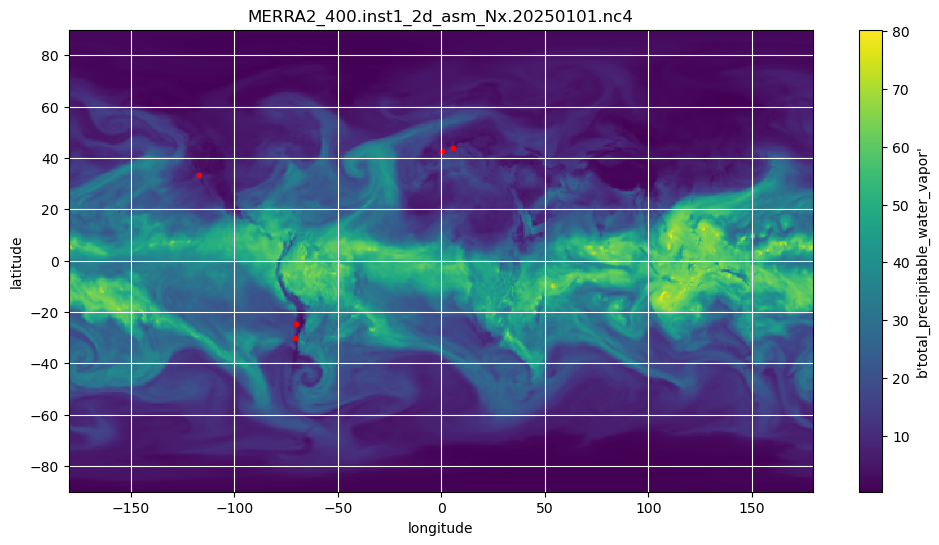

In [16]:
PlotData(longitude,latitude,data,12,6,title=base_filename,labelz=longname,
        longs=all_longs,
        lats=all_lats,
        tags=all_tags)

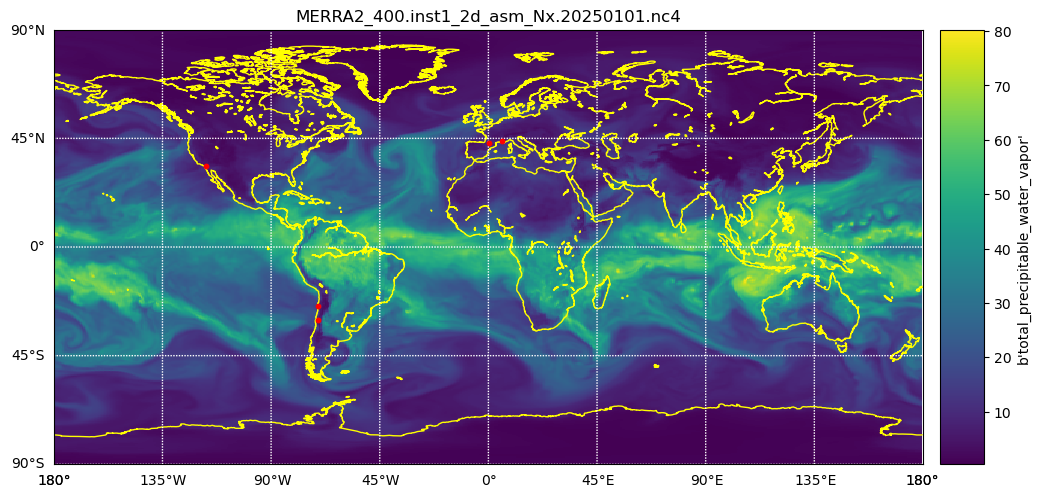

In [17]:
PlotGeoData(longitude,latitude,data,12,8,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags)

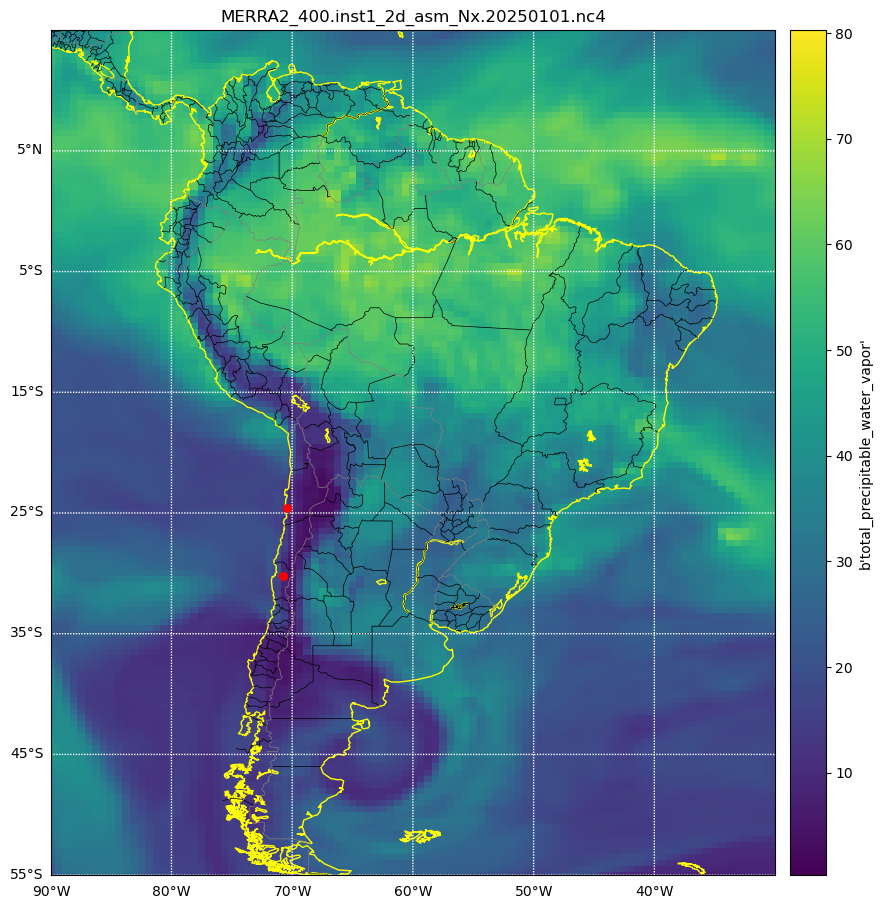

In [18]:
# Select area
LongMin=-90
LongMax=-30
LatMin=-55
LatMax=15  
    
PlotGeoData2(longitude,latitude,data,LatMin,LatMax,LongMin,LongMax,10,14,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags)

In [19]:
#m.scatter(x,y,3,marker='o',color='k')

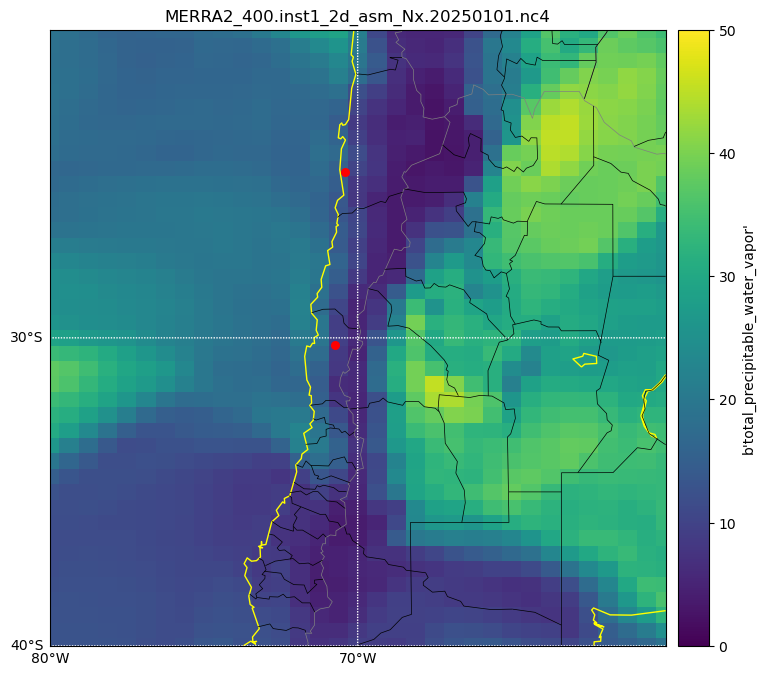

In [20]:
# Select area
LongMin=-80
LongMax=-60
LatMin=-40
LatMax=-20 
    
PlotGeoData2(longitude,latitude,data,LatMin,LatMax,LongMin,LongMax,14,8,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags,vrange=[0,50])

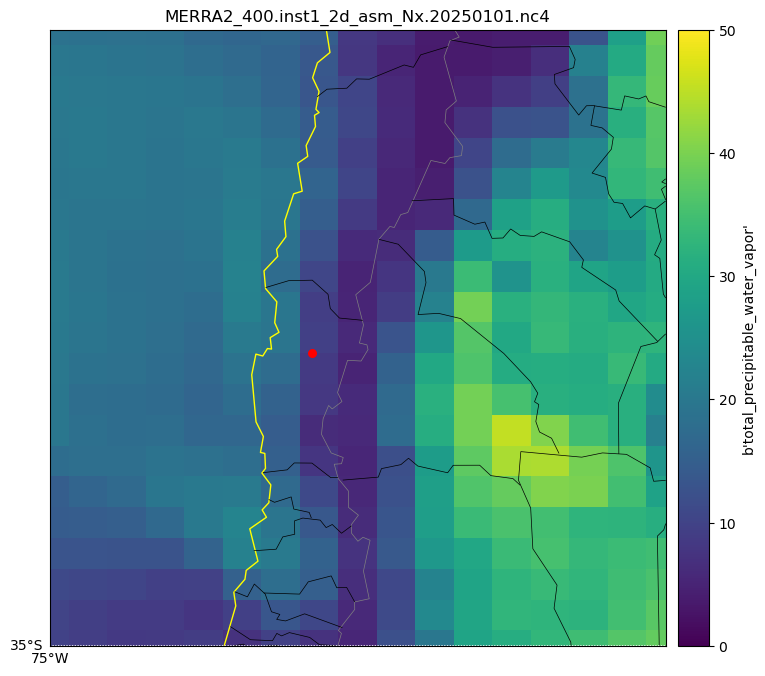

In [21]:
# Select area
LongMin=-75
LongMax=-65
LatMin=-35
LatMax=-25 
    
PlotGeoData2(longitude,latitude,data,LatMin,LatMax,LongMin,LongMax,14,8,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags,vrange=[0,50])

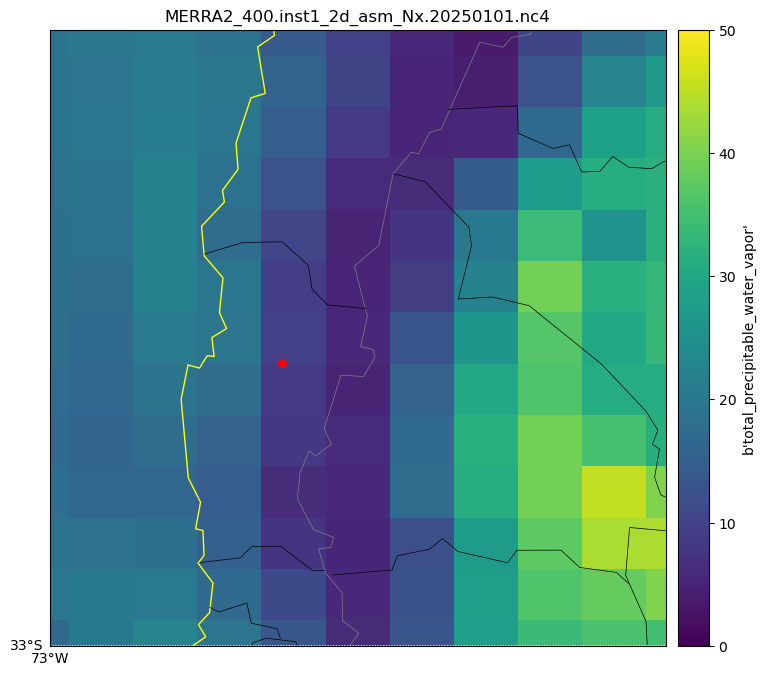

In [22]:
# Select area
LongMin=-73
LongMax=-67
LatMin=-33
LatMax=-27 
    
PlotGeoData2(longitude,latitude,data,LatMin,LatMax,LongMin,LongMax,14,8,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags,vrange=[0,50])

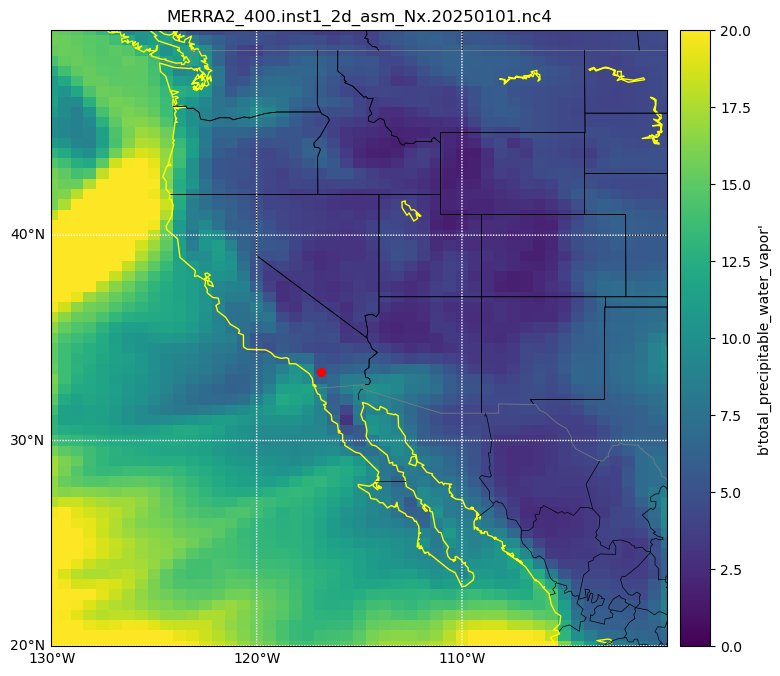

In [23]:
# Select area
LongMin=-130
LongMax=-100
LatMin=20
LatMax=50 
    
PlotGeoData2(longitude,latitude,data,LatMin,LatMax,LongMin,LongMax,14,8,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags,vrange=[0,20])

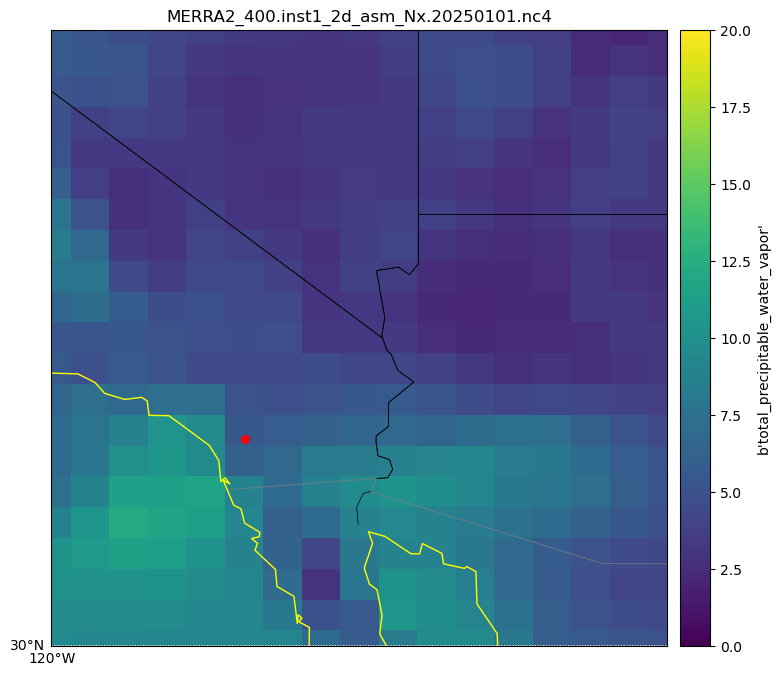

In [24]:
# Select area
LongMin=-120
LongMax=-110
LatMin=30
LatMax=40 
    
PlotGeoData2(longitude,latitude,data,LatMin,LatMax,LongMin,LongMax,14,8,title=base_filename,labelz=longname,
            longs=all_longs,
            lats=all_lats,
            tags=all_tags,vrange=[0,20])